<a href="https://colab.research.google.com/github/mrtimochee/GoogleTakeoutNestTemperatureAnalysis/blob/main/NestTemperatureAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Calculate HVAC system run time from Google Takeout Nest Thermostat json data files.**

**Input:** A folder containing Google Takeout Nest Thermostat data

**Output:** Panda DataFrame with columns 'Total_hrs', 'Heat1_hrs', 'HeatAux_hrs', 'Cool1_hrs' and matplotlib plots

In [ ]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import datetime as dt
import calendar

# Folder path to the data
path = "/content/drive/MyDrive/Nest/09AA01AF342104ZR/2022/"
folders = os.listdir(path)

In [ ]:
# Define DataFrame
daily_cycle_durations = pd.DataFrame(columns=['Total_hrs','Heat1_hrs','HeatAux_hrs','Cool1_hrs'])

for folder in folders:
    files = os.listdir(path + folder)
    for file in files:
        # Check for json file
        if file.find('.json')>=0:
            # Read json file
            f = open(path + folder + '/' + file,"r")
            data = json.loads(f.read())
            f.close()

            # Calculate daily run hours
            for day in data:
                total_duration = 0
                heat1_duration = 0
                heat_aux_duration = 0
                cool1_duration = 0
                for c in data[day]['cycles']:
                    # Total system run time for a given day
                    cycle_dur = round(int(c['duration'][:-1])/3600,2) #convert text to int then seconds to hours
                    total_duration += cycle_dur
                    
                    # Total run time for each system mode ie heating, cooling, etc
                    if c.get('heat1'):
                        heat1_duration += cycle_dur
                    if c.get('heataux'):
                        heat_aux_duration += cycle_dur
                    if c.get('cool1'):
                        cool1_duration += cycle_dur
                
                # Add to panda dataframe
                daily_cycle_durations.loc[dt.date.fromisoformat(day[0:10])] = [total_duration, heat1_duration, heat_aux_duration, cool1_duration]

In [ ]:
print(daily_cycle_durations)

            Total_hrs  Heat1_hrs  HeatAux_hrs  Cool1_hrs
2022-12-02      17.25      17.25          0.0       0.00
2022-12-03       5.34       5.34          0.0       0.00
2022-12-04       1.10       1.10          0.0       0.00
2022-12-05      24.00      24.00          0.0       0.00
2022-12-06       6.15       6.15          0.0       0.00
...               ...        ...          ...        ...
2022-06-26      24.00       0.00          0.0      24.00
2022-06-27       2.85       0.00          0.0       2.65
2022-06-28       4.58       0.00          0.0       3.28
2022-06-29       6.19       0.00          0.0       5.80
2022-06-30      24.00       0.00          0.0      24.00

[333 rows x 4 columns]


In [ ]:
# Save to csv
#daily_cycle_durations.to_csv('Nest_temperature_data_export_' + dt.datetime.now().strftime("%Y%m%d_%H%M%S") + '.csv')

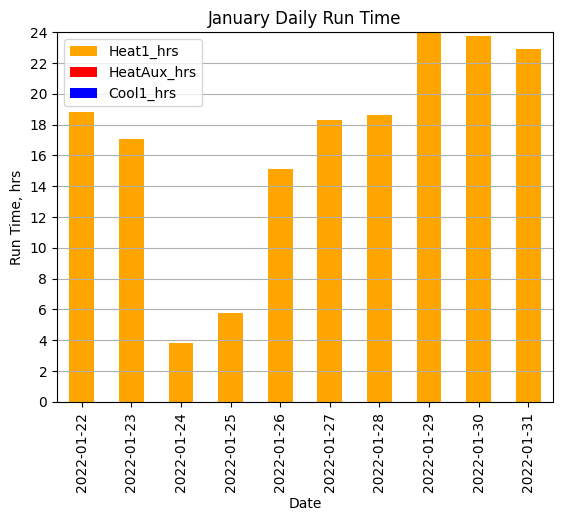

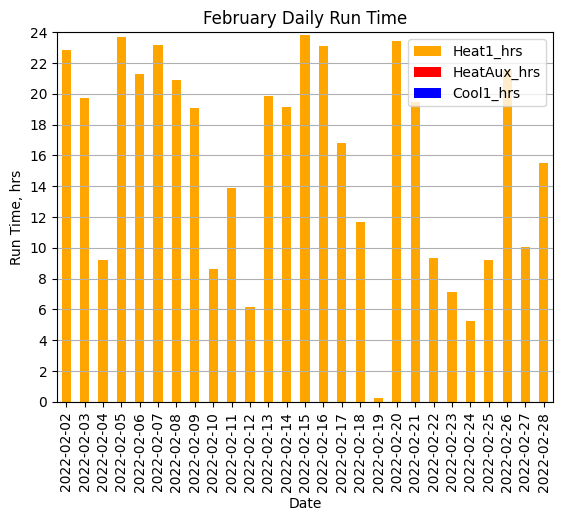

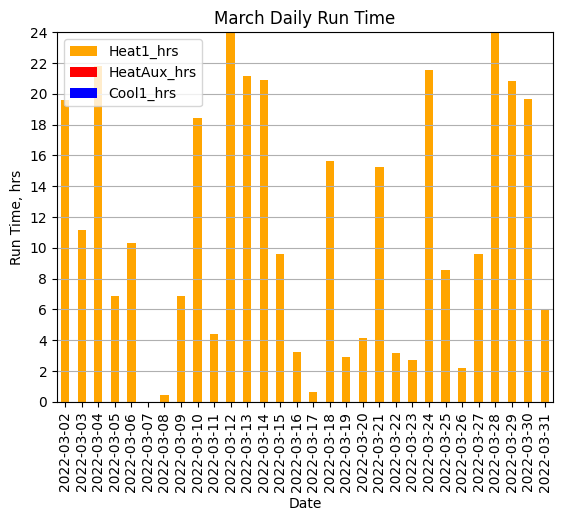

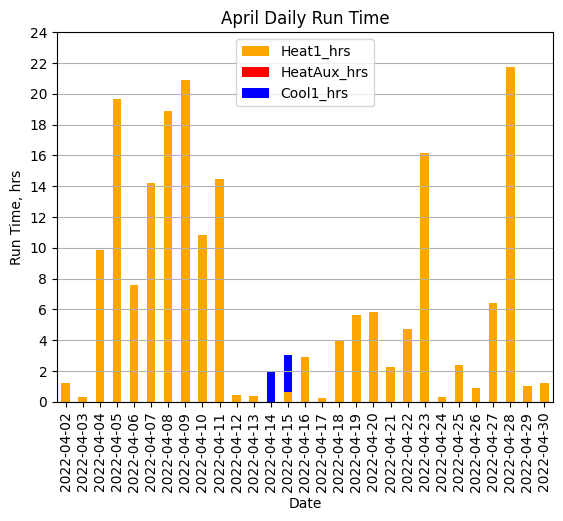

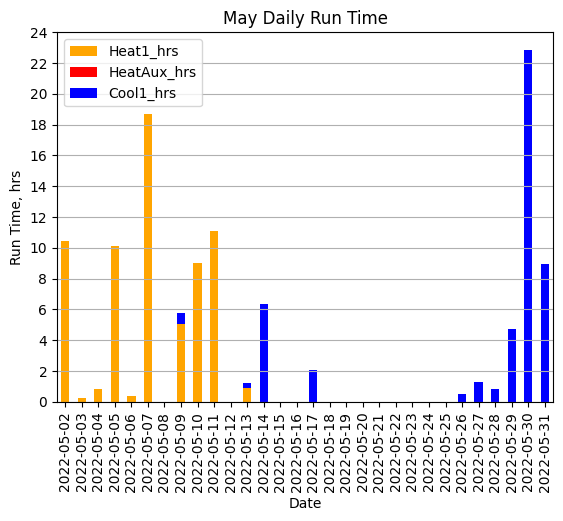

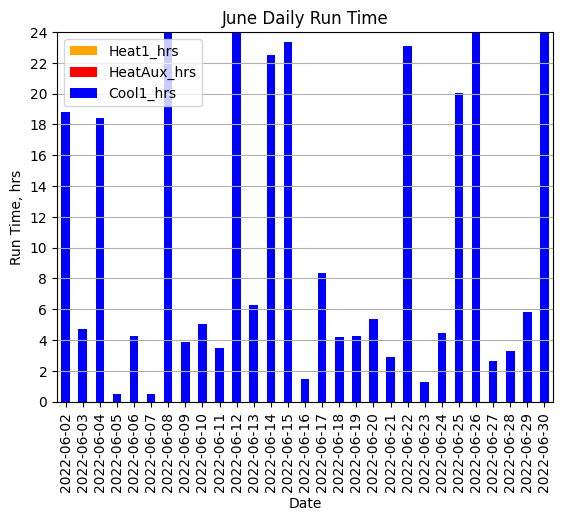

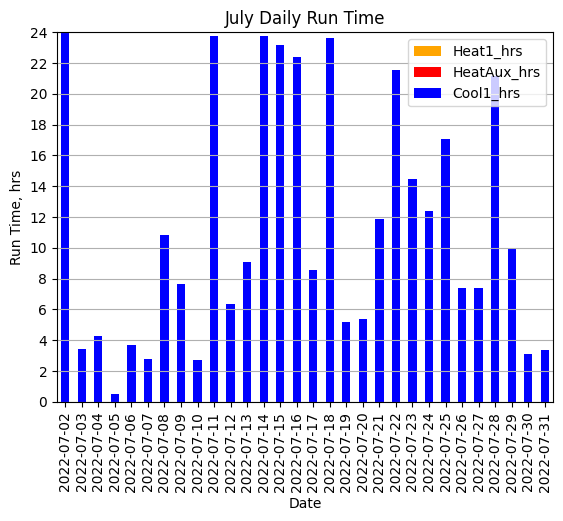

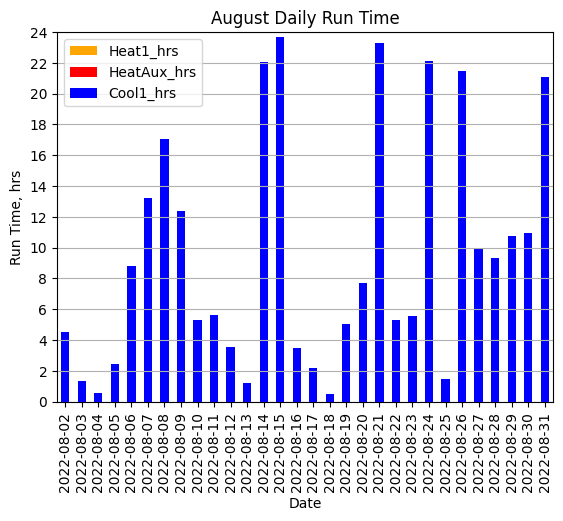

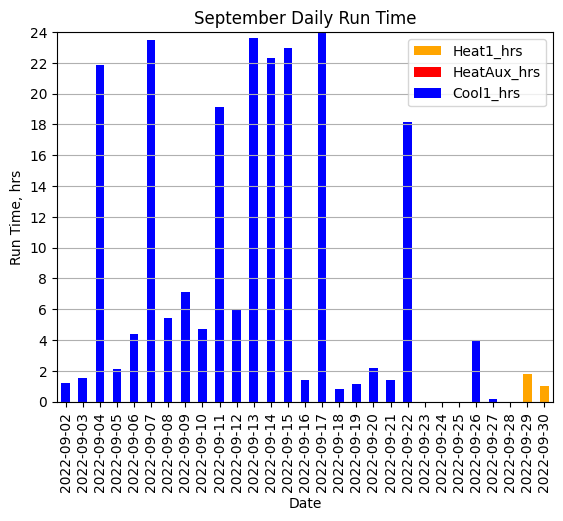

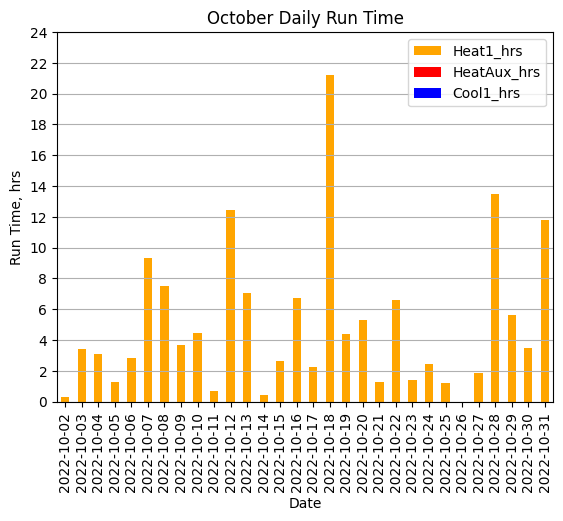

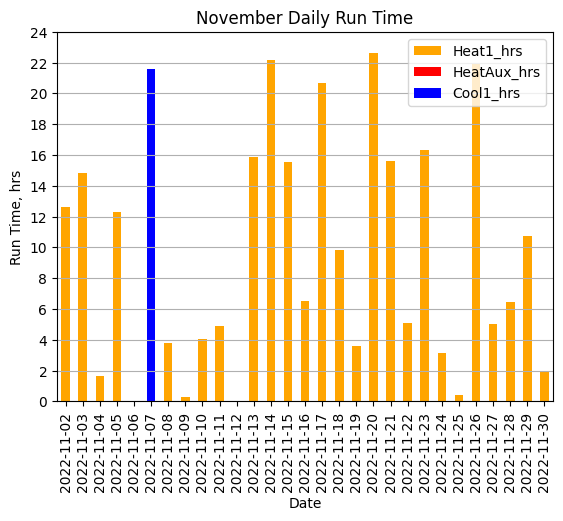

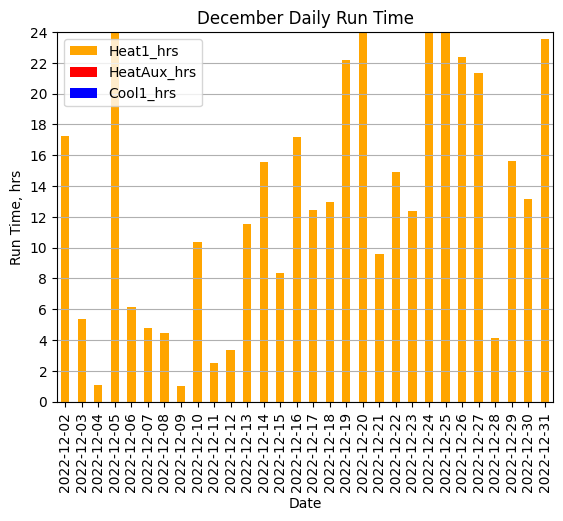

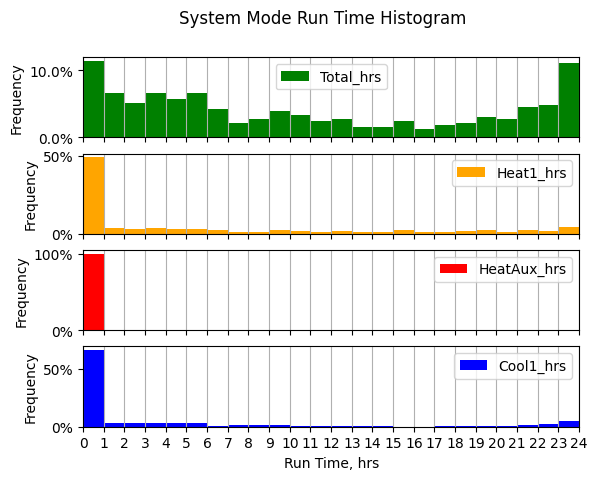

In [ ]:
# Plot
# Daily Run Time Plot
months = np.array([i.month for i in daily_cycle_durations.index])
for m in range(1,13):
    daily_cycle_durations.iloc[months==m].plot.bar(y=['Heat1_hrs','HeatAux_hrs','Cool1_hrs'], stacked=True, color=["orange","red","blue"])
    plt.title(calendar.month_name[m] + " Daily Run Time")
    plt.xlabel("Date")
    plt.ylabel("Run Time, hrs")
    plt.ylim(0, 24)
    plt.yticks(np.arange(0, 26, step=2))
    plt.grid(axis='y')

# System Mode Run Time Histogram
axes = daily_cycle_durations.plot.hist(density=True, bins=24, color=["green","orange","red","blue"], subplots=True,title="System Mode Run Time Histogram")
plt.xlim(0, 24)
plt.xticks(np.arange(0, 25, step=1))
plt.xlabel("Run Time, hrs")
for ax in axes:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.grid(axis='x')